## DATA VISUALISATION: Part II

In [1]:
import pandas as pd

## Importing the 2019 Bank Dataset:
- Features include: Transaction history(amount as well as the numbers) for the month of May for banks operating in India.
- Credit Card and Debit Cards outstanding
- Number of ATM's and POS machines deployed by the bank 

In [2]:
#importing the dataset of 2019 transactions
df=pd.read_excel("May_2019.copy.XLSX")

In [3]:
df.describe()

,Sr.No,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount
count,64.000000,65.000000,65.000000,6.500000e+01,65.0,6.500000e+01,65.000000,6.500000e+01,65.000000,65.000000,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01,65.000000
mean,32.500000,3375.938462,2987.723077,1.183111e+05,0.0,1.505255e+06,27369.723077,5.327787e+06,128.406504,18856.142952,2.462883e+07,2.509878e+07,1.269326e+07,9.066669e+04,17860.554872
std,18.618987,13857.055704,12682.170428,4.930620e+05,0.0,6.364549e+06,114123.077624,2.255661e+07,537.536674,79919.341391,1.047787e+08,1.100821e+08,5.301879e+07,3.873019e+05,75108.511193
min,1.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,16.750000,77.000000,2.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,5.398330e+05,5.136030e+05,2.206800e+05,2.082805e+03,324.346583
50%,32.500000,481.000000,282.000000,5.322000e+03,0.0,1.926000e+03,90.000000,3.792000e+03,0.345900,21.275091,2.838734e+06,2.354495e+06,1.564643e+06,9.097002e+03,1699.728683
75%,48.250000,2337.000000,805.000000,2.729500e+04,0.0,3.033970e+05,6157.000000,6.156000e+05,32.797700,1405.406032,1.210821e+07,9.068676e+06,5.467564e+06,3.815467e+04,7692.771373
max,64.000000,109718.000000,97101.000000,3.845111e+06,0.0,4.892080e+07,889516.000000,1.731531e+08,4173.211375,612824.645954,8.004371e+08,8.157102e+08,4.125309e+08,2.946668e+06,580468.033340


In [4]:
df.drop('Sr.No',axis=1,inplace=True)

In [5]:
#Checking if a particular bank data can be extracted based on its Name
df[(df['Bank Name']=='ALLAHABAD BANK')]

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount
0,ALLAHABAD BANK,761,196,3116,0,0,0,0,0.0,0.0,5910582,9068676,3259136,22773.785279,3491.793271


In [6]:
#dropping row number 64. this consisted of the 'Total' columns and may lead to wrong assessment in later analysis
df.drop([64],axis=0,inplace=True)

Using **Groupby** to see the top 5 banks which have the highest 5 credit cards outstanding.
**HDFC** banks has the highest here by a big margin

In [7]:
df.groupby('Bank Name').CC_Outstanding.sum().nlargest(5)

Bank Name
HDFC BANK LTD          12679846
STATE BANK OF INDIA     8734604
ICICI BANK LTD          7013846
AXIS BANK LTD           6170677
CITI BANK               2714145
Name: CC_Outstanding, dtype: int64

In [8]:
df.drop('POS_Offline',axis=1,inplace=True)

### Checking categorical and numerical values in the dataframe:

In [9]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O'))]
categorical_features

['Bank Name']

In [10]:
numerical_features=[feature for feature in df.columns if ((df[feature].dtypes!='O'))]
numerical_features

['ATM_Onsite',
 'ATM_Offsite',
 'POS_Online',
 'CC_Outstanding',
 'CC_ATM_Transaction',
 'CC_POS_Transaction',
 'CC_ATM_Amount',
 'CC_POS_Amount',
 'DC_Oustanding',
 'DC_ATM_Transaction',
 'DC_POS_Transaction',
 'DC_ATM_amount',
 'DC_POS_amount']

In [11]:
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]

In [12]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
continuous_features

['ATM_Onsite',
 'ATM_Offsite',
 'POS_Online',
 'CC_Outstanding',
 'CC_ATM_Transaction',
 'CC_POS_Transaction',
 'CC_ATM_Amount',
 'CC_POS_Amount',
 'DC_Oustanding',
 'DC_ATM_Transaction',
 'DC_POS_Transaction',
 'DC_ATM_amount',
 'DC_POS_amount']

## DATA VISUALISATION USING SEABORN: Histogram plots
> Herein the data is mapped in clusters to better understand the distribution of data for each **category**

C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

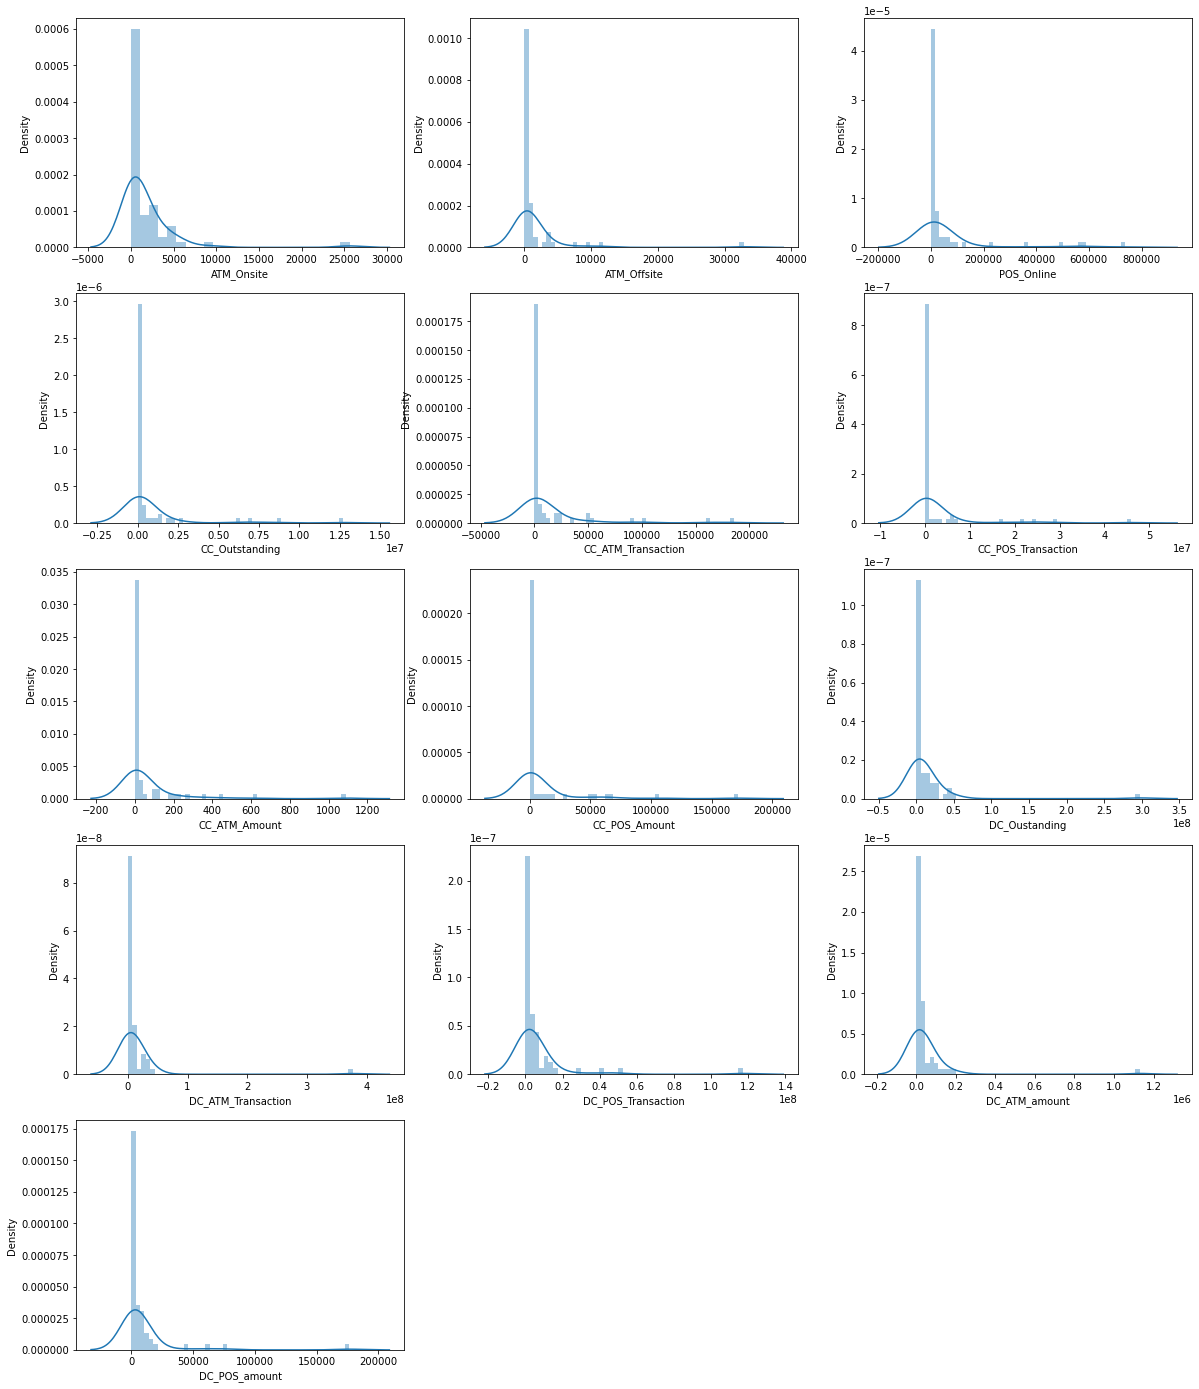

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for continuous_feature in continuous_features:
    ax=plt.subplot(12,3,plotnumber)
    #sns.histplot(df[continuous_feature],kde=True)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

### Boxplots of all the categories

C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sanyalam\Anac

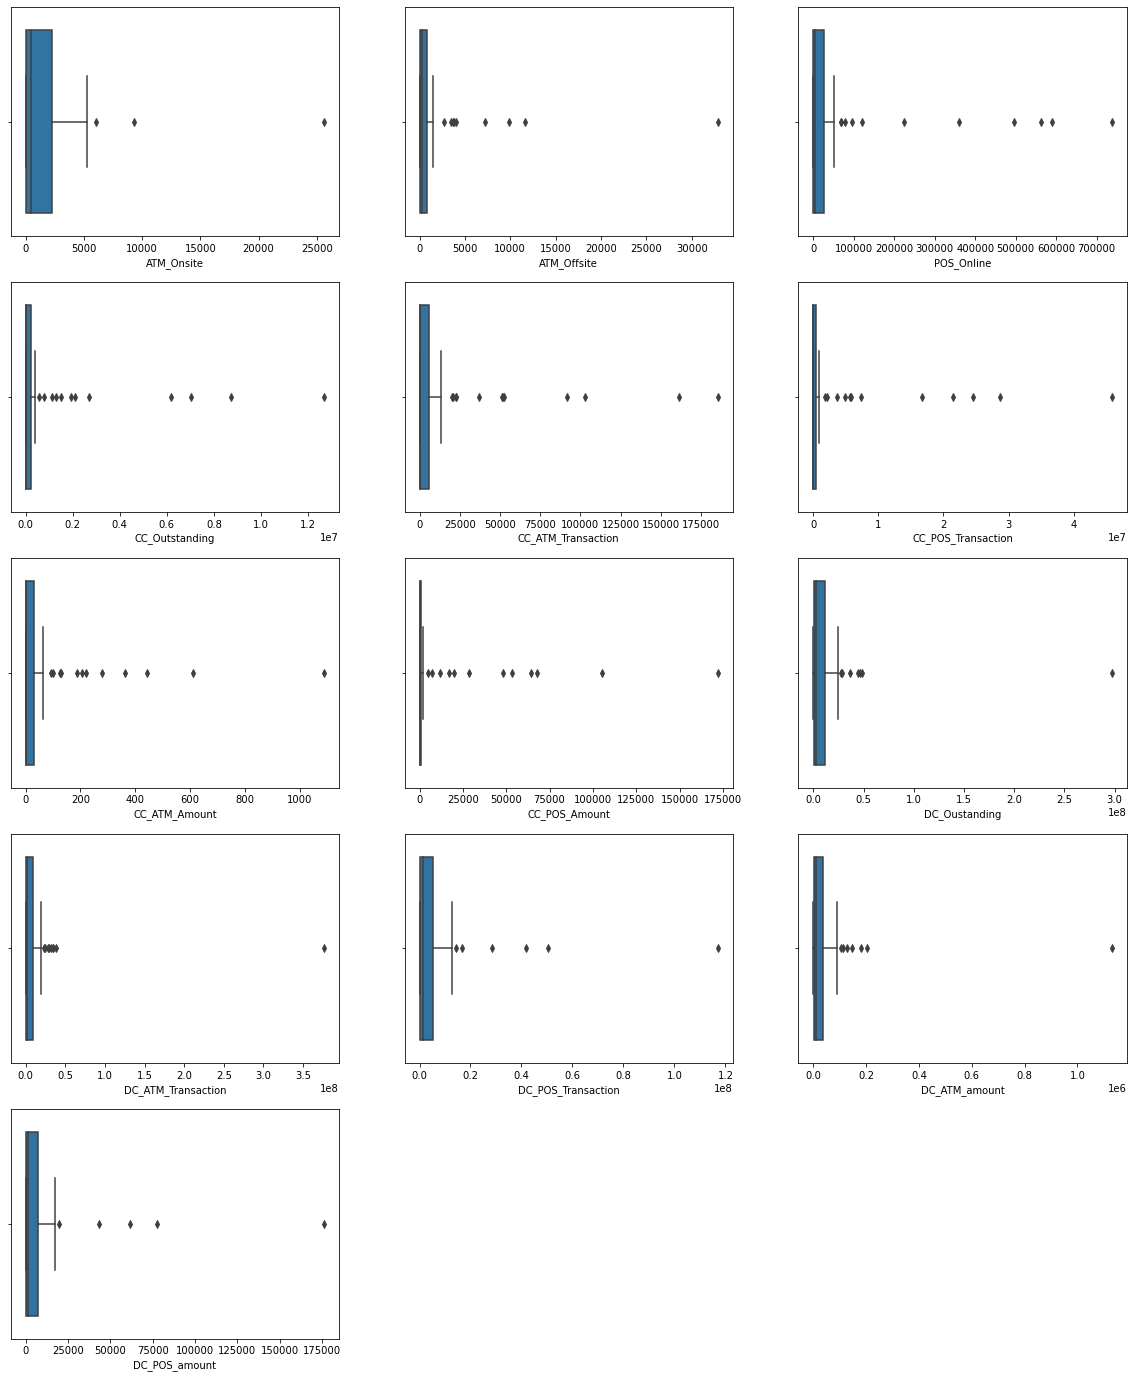

In [14]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for numerical_feature in numerical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

### Correlation Matrix of the various categories

<AxesSubplot:>

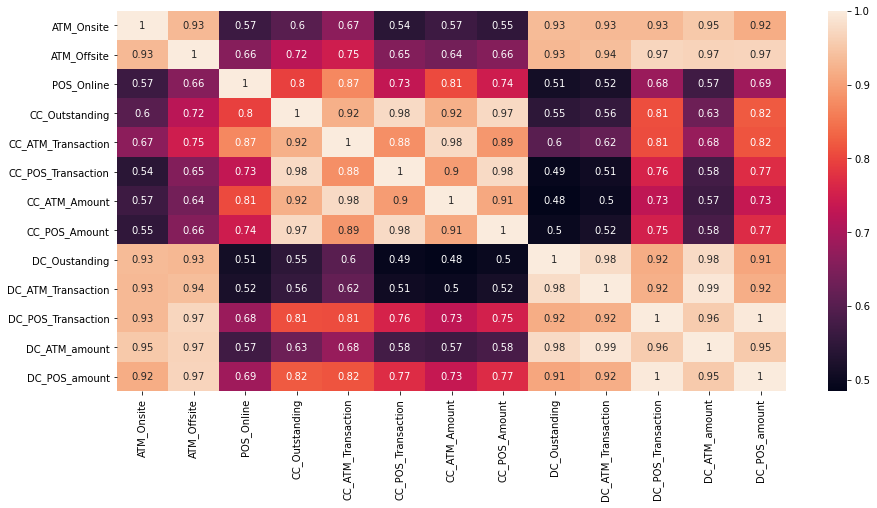

In [15]:
cor_mat=df.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

## EXPLORATORY DATA ANALYSIS

In [16]:
from itertools import groupby
groupby(df)

In [17]:
#Checking indicvidual group name
for key,group in (groupby(df)):
    print('key: ', key, ' group: ',list(group))

key:  Bank Name  group:  ['Bank Name']
key:  ATM_Onsite  group:  ['ATM_Onsite']
key:  ATM_Offsite  group:  ['ATM_Offsite']
key:  POS_Online  group:  ['POS_Online']
key:  CC_Outstanding  group:  ['CC_Outstanding']
key:  CC_ATM_Transaction  group:  ['CC_ATM_Transaction']
key:  CC_POS_Transaction  group:  ['CC_POS_Transaction']
key:  CC_ATM_Amount  group:  ['CC_ATM_Amount']
key:  CC_POS_Amount  group:  ['CC_POS_Amount']
key:  DC_Oustanding  group:  ['DC_Oustanding']
key:  DC_ATM_Transaction  group:  ['DC_ATM_Transaction']
key:  DC_POS_Transaction  group:  ['DC_POS_Transaction']
key:  DC_ATM_amount  group:  ['DC_ATM_amount']
key:  DC_POS_amount  group:  ['DC_POS_amount']


Creating copy of a dataframe

In [18]:
n_df=df.copy()

- In our analysis it is required to convert the transaction value to get the accurate representation of per card value
> For Example: The formula we use is: **Credit Card POS Amount= Credit Card POS Amount x INR 10,00,000**
- This gives us the new POS Amount for the particular dataset

In [19]:
n_df['DC_ATM_amount']=n_df['DC_ATM_amount']*1000000

In the next step of analysis, we will be creating new columns in the dataframe to calculate the average transaction value per card type of a bank. 
> The formula used will be: **Average Transaction Value(card type): Total Value of Transactions/Total number of transactions**

In [20]:
for ind,row in n_df.iterrows():
    n_df.loc[ind,"DC_ATM_PTransac"]=row["DC_ATM_amount"]/row["DC_ATM_Transaction"] if row["DC_ATM_Transaction"]!=0 else 0

In [21]:
n_df["DC_ATM_PTransac"]

0     2511.258014
1     3529.053595
2     3921.682571
3     3671.964331
4     3704.248488
         ...     
59    3445.139237
60    3496.828254
61    1893.322611
62    4079.821833
63    3623.023447
Name: DC_ATM_PTransac, Length: 64, dtype: float64

### Giving labels to the bank based on ownership status

In [22]:
bank_type=[]
for row in df['Bank Name']:
    if row=='ALLAHABAD BANK' or row=='ANDHRA BANK' or row=='BANK OF BARODA' or row== 'BANK OF INDIA' or row=='BANK OF MAHARASHTRA'or row=='CANARA BANK' or row=='CENTRAL BANK OF INDIA' or row== 'CORPORATION BANK' or row== 'INDIAN BANK' or row== 'INDIAN OVERSEAS BANK' or row== 'ORIENTAL BANK OF COMMERCE' or row=='PUNJAB AND SIND BANK' or row== 'PUNJAB NATIONAL BANK' or row=='SYNDICATE BANK' or row=='UCO BANK' or row=='UNION BANK OF INDIA' or row=='UNITED BANK OF INDIA' or row== 'STATE BANK OF INDIA' or row=='CITY UNION BANK' or row== 'JAMMU AND KASHMIR BANK' or row=='KARNATAKA BANK LTD':
        bank_type.append('Government Bank')
    else:
        bank_type.append('Private Bank')

In [23]:
n_df['bank_type']=bank_type

In [24]:
n_df.head(1)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,DC_ATM_PTransac,bank_type
0,ALLAHABAD BANK,761,196,3116,0,0,0,0.0,0.0,5910582,9068676,3259136,2.277379e+10,3491.793271,2511.258014,Government Bank


In [25]:
criteria=(n_df['bank_type']=='Government Bank')

Checking the government banks distribution using **describe** function

## Data visualisation using Seaborn: Barplot (2019 Dataset)

In [26]:
#Creting New dataset
new_df=n_df[criteria]

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
new_df.head(1)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,DC_ATM_PTransac,bank_type
0,ALLAHABAD BANK,761,196,3116,0,0,0,0.0,0.0,5910582,9068676,3259136,2.277379e+10,3491.793271,2511.258014,Government Bank


In [29]:
# Number of private banks and government banks in the dataset
s=n_df.bank_type
counts=s.value_counts()
percent100=s.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
percent100

Private Bank       67.2%
Government Bank    32.8%
Name: bank_type, dtype: object

### Visualisation of POS Debit Card Transactions: Government Banks (Dataset 2019)

In [30]:
n_df['DC_POS_amount']=n_df['DC_POS_amount']*1000000

In [31]:
for ind,row in n_df.iterrows():
    n_df.loc[ind,"DC_POS_PTransac"]=row["DC_POS_amount"]/row["DC_POS_Transaction"] if row["DC_POS_Transaction"]!=0 else 0

In [32]:
#distribution
def plot_compare(df,var,var2):
    fig=plt.figure()
    ax=fig.add_subplot(111)
    sns.kdeplot(df[var],color='r',shade=True,hue=df[var2])
    lines,labels=ax.get_legend_handles_labels()
    ax.legend(lines,labels,loc='upper left')
    plt.grid(False)
    plt.show()

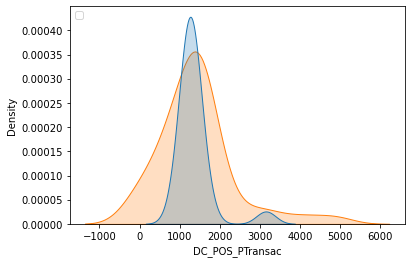

In [33]:
plot_compare(n_df,'DC_POS_PTransac','bank_type')

In [34]:
criteria=n_df['bank_type']=='Government Bank'
new_df=n_df[criteria]

In [35]:
z2=new_df['DC_POS_PTransac'].mean()
z2

1359.9976477116943

### Details of the plot

1. We will plot the Average value per transaction for debit cards in POS, on the 2019 **government** dataset
> The main motive of the plot is to understand how the banks stack up against each other in terms of value spent per transaction
2. This will also help us segregate which has customers with higher incomes
3. A total of 21 government banks are plotted below
- **X- Axis**: Bank Name
- **Left Y- Axis**: Average Value Per Transaction Debit Card(POS)
- **Right Y-Axis**: Total number of transactions

> I have also plotted the number of transactions as well to give a clear view of how average revenue may be influenced by the total number of transactions

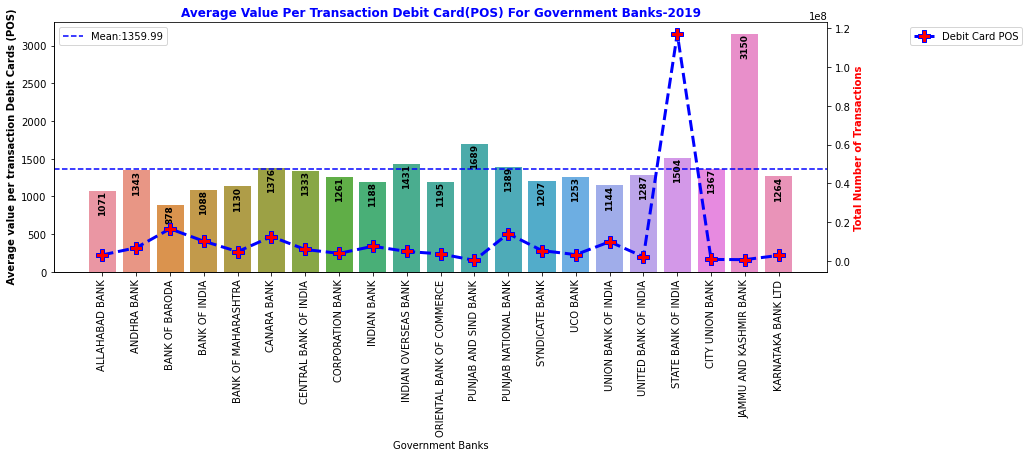

In [36]:
import numpy as np
plot=sns.catplot(x="Bank Name",y="DC_POS_PTransac",data=new_df,kind='bar',height=4,aspect=3)#palette='Pastel1'
plt.axhline(z2,color='b',linestyle="--",label='Mean:1359.99')
plt.legend()
plt.xticks(rotation=90)
plt.title('Average Value Per Transaction Debit Card(POS) For Government Banks-2019',color='b',fontweight='bold')
plt.xlabel("Government Banks")
plt.ylabel(" Average value per transaction Debit Cards (POS)",fontweight='bold')
plt.grid(False)

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='top', 
        color='black',
        fontweight='bold',
        rotation=90,
        size=9)

x = new_df["Bank Name"]
y = new_df["DC_POS_Transaction"]
axes2 = plt.twinx()
axes2.plot(x, y, color='b',label='Debit Card POS',marker='P', markerfacecolor='red',markersize=12,linestyle='dashed', linewidth = 3)
plt.legend(bbox_to_anchor=(1.1,1),loc='upper left')
axes2.set_ylabel('Total Number of Transactions',fontweight='bold',color='r')
plt.grid(False)


Similarly for **Credit Cards** the similar process as above is conducted

In [37]:
check1_df=new_df[['Bank Name','DC_POS_Transaction']]

In [38]:
n_df['CC_POS_Amount']=n_df['CC_POS_Amount']*1000000

In [39]:
for ind,row in n_df.iterrows():
    n_df.loc[ind,"CC_POS_PTransac_CC"]=row["CC_POS_Amount"]/row["CC_POS_Transaction"] if row["CC_POS_Transaction"]!=0 else 0

In [40]:
n_df['CC_ATM_Amount']=n_df['CC_ATM_Amount']*1000000

In [41]:
for ind,row in n_df.iterrows():
    n_df.loc[ind,"CC_ATM_PTransac"]=row["CC_ATM_Amount"]/row["CC_ATM_Transaction"] if row["CC_ATM_Transaction"]!=0 else 0

Extracting the government dataset on the basis of **Average Value per transaction** greater than Rs 5000 and then sorting them on the basis of ATM transactions.
> Only 3 banks qualify: Canara, BOI and Indian Bank

In [42]:
n_df[(n_df['bank_type']=='Government Bank') & (n_df['CC_ATM_PTransac']>5000)].sort_values(by='CC_ATM_Transaction',ascending=False)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,DC_ATM_PTransac,bank_type,DC_POS_PTransac,CC_POS_PTransac_CC,CC_ATM_PTransac
5,CANARA BANK,4760,4077,21910,381745,52412,786726,2.800752e+08,1.628261e+09,18437346,23759272,12679492,1.039302e+11,1.745155e+10,4374.301269,Government Bank,1376.360172,2069.667497,5343.722430
3,BANK OF INDIA,2645,3509,67740,185605,22457,344241,1.270868e+08,8.497922e+08,36822577,19297659,10305371,7.086032e+10,1.122012e+10,3671.964331,Government Bank,1088.764059,2468.596724,5659.115428
8,INDIAN BANK,3198,696,10938,87772,2746,149605,1.510000e+07,3.473000e+08,14590113,34024067,7691534,6.925430e+10,9.144100e+09,2035.450377,Government Bank,1188.852575,2321.446476,5498.907502


- Extracting values based on ownership status and creating datasets consisting of only selected properties for further analysis

> This will be done using **groupby** function

In [43]:
ww=n_df.groupby('Bank Name').DC_POS_PTransac.sum()

In [44]:
ww1=n_df.groupby('Bank Name').CC_POS_PTransac_CC.sum()

**Concateninating** both the columns together

In [45]:
a1_df=pd.concat([ww,ww1],axis='columns')

In [46]:
a1_df.head(3)

,DC_POS_PTransac,CC_POS_PTransac_CC
Bank Name,,
ADITYA BIRLA IDEA PAYMENTS BANK,706.074906,0.0
AIRTEL PAYMENTS BANK,558.300121,0.0
ALLAHABAD BANK,1071.386180,0.0


Arranging the datasets based on values which are greater than '0' and dropping the others

In [47]:
arranged_cc=a1_df[(a1_df['CC_POS_PTransac_CC']>0)]

In [48]:
arranged_dc=a1_df[(a1_df['DC_POS_PTransac']>0)]

In [49]:
combined_pos=a1_df[(a1_df['DC_POS_PTransac']>0) & (a1_df['CC_POS_PTransac_CC']>0)]
combined_pos.head(2)

,DC_POS_PTransac,CC_POS_PTransac_CC
Bank Name,,
ANDHRA BANK,1343.460716,2429.806209
AXIS BANK LTD,1509.317696,3864.842951


Concatening the dataset based on **ownership** type

In [50]:
bank_df=pd.concat([n_df['Bank Name'],n_df['bank_type']],axis='columns')
bank_df.head(2)

,Bank Name,bank_type
0,ALLAHABAD BANK,Government Bank
1,ANDHRA BANK,Government Bank


## Merging Dataframes

In [51]:
merged_inner=pd.merge(left=a1_df,right=bank_df,left_on=a1_df.index,right_on='Bank Name')

In [52]:
merged_final=merged_inner.set_index('Bank Name')

Sorting condition being governmant bank dataset whose average revenue per transacation for the year 2019 is greater than **zero** for both **CC & DC**

In [53]:
merged_inner1=merged_inner[(merged_inner['DC_POS_PTransac']>0) & (merged_inner['CC_POS_PTransac_CC']>0) & (merged_inner['bank_type']=='Government Bank')]

In [54]:
merged_inner11=merged_inner1.set_index('Bank Name')
merged_inner11.head(5)

,DC_POS_PTransac,CC_POS_PTransac_CC,bank_type
Bank Name,,,
ANDHRA BANK,1343.460716,2429.806209,Government Bank
BANK OF BARODA,878.613475,2245.778160,Government Bank
BANK OF INDIA,1088.764059,2468.596724,Government Bank
CANARA BANK,1376.360172,2069.667497,Government Bank
CENTRAL BANK OF INDIA,1333.038480,2233.287849,Government Bank


In [55]:
# Creating individual conditions as well
government_dc_pos=merged_inner[(merged_inner['DC_POS_PTransac']>0) & (merged_inner['bank_type']=='Government Bank')]
government_dc_pos=government_dc_pos.set_index('Bank Name')

In [56]:
government_cc_pos=merged_inner[(merged_inner['CC_POS_PTransac_CC']>0) & (merged_inner['bank_type']=='Government Bank')]
government_cc_pos=government_cc_pos.set_index('Bank Name')

### Merging datasets for private banks 2019 (POS Machines)

In [57]:
private_combined_df=merged_final[(merged_final['DC_POS_PTransac']>0) & (merged_final['CC_POS_PTransac_CC']>0) & (merged_final['bank_type']=='Private Bank')]

In [58]:
private_dc_pos=merged_final[(merged_final['DC_POS_PTransac']>0) & (merged_final['bank_type']=='Private Bank')]

In [59]:
private_cc_pos=merged_final[(merged_final['CC_POS_PTransac_CC']>0) & (merged_final['bank_type']=='Private Bank')]

## 2018 Dataset: Exploratory data analysis

In [60]:
df_2018=pd.read_excel("May_2018 - Copy.XLS")

In [61]:
df_2018.drop('Sr.No',axis=1,inplace=True)

In [62]:
df_2018.head(1)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount
0,ALLAHABAD BANK,850,265,3063,0,0,0,0,0.0,0.0,13042946,8196370,4687837,20161.644307,3023.795909


In [63]:
df_2018.drop([66],axis=0,inplace=True)

## Labelling banks based on ownership status

In [64]:
bank_type=[]
for row in df_2018['Bank Name']:
    if row=='ALLAHABAD BANK' or row=='ANDHRA BANK' or row=='BANK OF BARODA' or row== 'BANK OF INDIA' or row=='BANK OF MAHARASHTRA'or row=='CANARA BANK' or row=='CENTRAL BANK OF INDIA' or row== 'CORPORATION BANK' or row== 'INDIAN BANK' or row== 'INDIAN OVERSEAS BANK' or row== 'ORIENTAL BANK OF COMMERCE' or row=='PUNJAB AND SIND BANK' or row== 'PUNJAB NATIONAL BANK' or row=='SYNDICATE BANK' or row=='UCO BANK' or row=='UNION BANK OF INDIA' or row=='UNITED BANK OF INDIA' or row== 'STATE BANK OF INDIA' or row=='CITY UNION BANK' or row== 'JAMMU AND KASHMIR BANK' or row=='KARNATAKA BANK LTD' or row=='DENA BANK' or row=='VIJAYA BANK':
        bank_type.append('Government Bank')
    else:
        bank_type.append('Private Bank')

In [65]:
#creating copy of the dataset
df_2018_copy=df_2018.copy()

In [66]:
df_2018_copy['bank_type']=bank_type

In [67]:
df_2018_copy.head(2)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,bank_type
0,ALLAHABAD BANK,850,265,3063,0,0,0,0,0.000000,0.000000,13042946,8196370,4687837,20161.644307,3023.795909,Government Bank
1,ANDHRA BANK,3182,808,14311,0,240799,14162,503715,67.200869,1224.019664,24741870,8689780,6050753,29446.050534,8014.800000,Government Bank


> Converting the transaction amounts to INR crores for further analysis

In [68]:
df_2018_copy['DC_ATM_amount']=df_2018_copy['DC_ATM_amount']*1000000

In the next step of analysis, we will be creating new columns in the dataframe to calculate the average transaction value per card type of a bank. 
> The formula used will be: **Average Transaction Value(card type): Total Value of Transactions/Total number of transactions**

In [69]:
for ind,row in df_2018_copy.iterrows():
    df_2018_copy.loc[ind,"DC_ATM_PTransac_1"]=row["DC_ATM_amount"]/row["DC_ATM_Transaction"] if row["DC_ATM_Transaction"]!=0 else 0

In [70]:
criteria_1=df_2018_copy['bank_type']=='Government Bank'

In [71]:
df_govt_2018=df_2018_copy[criteria_1]

In [72]:
df_govt_atm_2018=df_govt_2018[['Bank Name','DC_ATM_PTransac_1']]

In [73]:
df_govt_atm_2019=new_df[['Bank Name','DC_ATM_PTransac']]

## Merging the dataset

In [74]:
df_govt_atm_combined=pd.merge(left=df_govt_atm_2018,right=df_govt_atm_2019,left_on='Bank Name',right_on='Bank Name')

In [75]:
df_govt_atm_combined.head(2)

,Bank Name,DC_ATM_PTransac_1,DC_ATM_PTransac
0,ALLAHABAD BANK,2459.826034,2511.258014
1,ANDHRA BANK,3388.584122,3529.053595


Finding out **Year on Year Growth** for both ***number of transactions*** as well as ***average value per transaction for a card***
> Formula to be used: YOY growth (in absolute terms): (Final Value (2019)-Initial Value(2018))/Initial value(2018)

### Year on Year growth for 2018 ATM 'debit card' per transaction value

In [76]:
df_govt_atm_combined['YoY growth']=(df_govt_atm_combined['DC_ATM_PTransac']-df_govt_atm_combined['DC_ATM_PTransac_1'])/df_govt_atm_combined['DC_ATM_PTransac_1']*100

In [77]:
df_govt_atm_combined.sort_values(by='YoY growth',ascending=False).head(5)

,Bank Name,DC_ATM_PTransac_1,DC_ATM_PTransac,YoY growth
3,BANK OF INDIA,2267.566846,3671.964331,61.934116
1,ANDHRA BANK,3388.584122,3529.053595,4.145374
0,ALLAHABAD BANK,2459.826034,2511.258014,2.090879
5,CANARA BANK,4292.274770,4374.301269,1.911026
18,CITY UNION BANK,4520.912909,4602.435457,1.803232


- Similarly for credit card transactions

In [78]:
df_2018_copy['CC_ATM_Amount']=df_2018_copy['CC_ATM_Amount']*1000000

In [79]:
for ind,row in df_2018_copy.iterrows():
    df_2018_copy.loc[ind,"CC_ATM_PTransac_1"]=row["CC_ATM_Amount"]/row["CC_ATM_Transaction"] if row["CC_ATM_Transaction"]!=0 else 0

In [80]:
df_govt_2018_cc=df_2018_copy[criteria_1]

In [81]:
df_govt_cc_atm_2018=df_govt_2018_cc[['Bank Name','CC_ATM_PTransac_1']]

In [82]:
df_govt_cc_atm_2019=n_df[['Bank Name','CC_ATM_PTransac']]

In [83]:
df_govt_atm_cc_combined=pd.merge(left=df_govt_cc_atm_2018,right=df_govt_cc_atm_2019,left_on='Bank Name',right_on='Bank Name')

In [84]:
df_govt_atm_cc_combined.head(5)

,Bank Name,CC_ATM_PTransac_1,CC_ATM_PTransac
0,ALLAHABAD BANK,0.000000,0.000000
1,ANDHRA BANK,4745.153860,4604.995951
2,BANK OF BARODA,4143.439754,4394.658823
3,BANK OF INDIA,5409.250896,5659.115428
4,BANK OF MAHARASHTRA,0.000000,0.000000


In [85]:
df_govt_atm_cc_combined['YoY growth']=(df_govt_atm_cc_combined['CC_ATM_PTransac']-df_govt_atm_cc_combined['CC_ATM_PTransac_1'])/df_govt_atm_cc_combined['CC_ATM_PTransac_1']*100

In [86]:
# Dropping the rows which have NaN in them
a2_df=df_govt_atm_cc_combined.drop([0,4,10,11,16,20,14],axis=0)

In [87]:
a2_df.sort_values(by='YoY growth',ascending=False).head(5)

,Bank Name,CC_ATM_PTransac_1,CC_ATM_PTransac,YoY growth
13,SYNDICATE BANK,3607.343928,4261.471321,18.133214
8,INDIAN BANK,5005.854801,5498.907502,9.849521
2,BANK OF BARODA,4143.439754,4394.658823,6.063056
5,CANARA BANK,5102.087737,5343.722430,4.735996
3,BANK OF INDIA,5409.250896,5659.115428,4.619208


**Similarly** for Debit Card POS and Credit Card POS 2018 Dataset

In [88]:
df_2018_copy['DC_POS_amount']=df_2018_copy['DC_POS_amount']*1000000

In [89]:
df_2018_copy.head(2)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,bank_type,DC_ATM_PTransac_1,CC_ATM_PTransac_1
0,ALLAHABAD BANK,850,265,3063,0,0,0,0,0.00,0.000000,13042946,8196370,4687837,2.016164e+10,3.023796e+09,Government Bank,2459.826034,0.00000
1,ANDHRA BANK,3182,808,14311,0,240799,14162,503715,67200868.96,1224.019664,24741870,8689780,6050753,2.944605e+10,8.014800e+09,Government Bank,3388.584122,4745.15386


In [90]:
for ind,row in df_2018_copy.iterrows():
    df_2018_copy.loc[ind,"DC_POS_PTransac_2018"]=row["DC_POS_amount"]/row["DC_POS_Transaction"] if row["DC_POS_Transaction"]!=0 else 0

In [91]:
df_2018_copy['CC_POS_Amount']=df_2018_copy['CC_POS_Amount']*1000000

In [92]:
for ind,row in df_2018_copy.iterrows():
    df_2018_copy.loc[ind,"CC_POS_PTransac_2018"]=row["CC_POS_Amount"]/row["CC_POS_Transaction"] if row["CC_POS_Transaction"]!=0 else 0

In [93]:
df_2018_copy.head(1)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,bank_type,DC_ATM_PTransac_1,CC_ATM_PTransac_1,DC_POS_PTransac_2018,CC_POS_PTransac_2018
0,ALLAHABAD BANK,850,265,3063,0,0,0,0,0.0,0.0,13042946,8196370,4687837,2.016164e+10,3.023796e+09,Government Bank,2459.826034,0.0,645.030087,0.0


**New Datasets** credit and debit card

In [94]:
# Credit card government dataset 2018
df_govt_2018_cc_1=df_2018_copy[criteria_1]

In [95]:
df_govt_cc_pos_2018=df_govt_2018_cc_1[['Bank Name','CC_POS_PTransac_2018']]

In [96]:
df_govt_cc_pos_2019=n_df[['Bank Name','CC_POS_PTransac_CC']]

### Government Banks Credit Card POS

In [97]:
df_govt_pos_cc_combined=pd.merge(left=df_govt_cc_pos_2018,right=df_govt_cc_pos_2019,left_on='Bank Name',right_on='Bank Name')
df_govt_pos_cc_combined.head(2)

,Bank Name,CC_POS_PTransac_2018,CC_POS_PTransac_CC
0,ALLAHABAD BANK,0.000000,0.000000
1,ANDHRA BANK,2429.984542,2429.806209


In [98]:
df_govt_pos_cc_combined['YoY growth']=(df_govt_pos_cc_combined['CC_POS_PTransac_CC']-df_govt_pos_cc_combined['CC_POS_PTransac_2018'])/df_govt_pos_cc_combined['CC_POS_PTransac_2018']*100

In [99]:
#YoY growth avg. value per transactions for credit cards(POS)
df_govt_pos_cc_combined.sort_values(by='YoY growth',ascending=False).head(2)

,Bank Name,CC_POS_PTransac_2018,CC_POS_PTransac_CC,YoY growth
8,INDIAN BANK,253.945220,2321.446476,814.152459
16,UNITED BANK OF INDIA,1832.456571,2455.290407,33.989009


In [100]:
df_govt_dc_pos_2018=df_govt_2018_cc_1[['Bank Name','DC_POS_PTransac_2018']]

In [101]:
df_govt_dc_pos_2019=n_df[['Bank Name','DC_POS_PTransac']]

In [102]:
df_govt_pos_dc_combined=pd.merge(left=df_govt_dc_pos_2018,right=df_govt_dc_pos_2019,left_on='Bank Name',right_on='Bank Name')
df_govt_pos_dc_combined.head(2)

,Bank Name,DC_POS_PTransac_2018,DC_POS_PTransac
0,ALLAHABAD BANK,645.030087,1071.386180
1,ANDHRA BANK,1324.595468,1343.460716


In [103]:
df_govt_pos_dc_combined['YoY growth']=(df_govt_pos_dc_combined['DC_POS_PTransac']-df_govt_pos_dc_combined['DC_POS_PTransac_2018'])/df_govt_pos_dc_combined['DC_POS_PTransac_2018']*100

In [104]:
df_govt_pos_dc_combined.sort_values(by='YoY growth',ascending=False).head(2)

,Bank Name,DC_POS_PTransac_2018,DC_POS_PTransac,YoY growth
0,ALLAHABAD BANK,645.030087,1071.386180,66.098637
3,BANK OF INDIA,856.377779,1088.764059,27.135954


### For Private Bank dataset

In [105]:
criteria_11=n_df['bank_type']=='Private Bank'
new_private_df=n_df[criteria_11]

In [106]:
df_pvt_dc_2019=new_private_df[['Bank Name','DC_ATM_PTransac']]

In [107]:
df_pvt_dc_2019.head(5)

,Bank Name,DC_ATM_PTransac
17,IDBI LTD,4450.904286
19,AXIS BANK LTD,5010.412200
20,BANDHAN BANK LTD,3750.930428
21,CATHOLIC SYRIAN BANK LTD,4055.281609
23,DCB BANK LTD,5163.884960


In [108]:
criteria_12=(df_2018_copy['bank_type']=='Private Bank')
new_private_df_2018=df_2018_copy[criteria_12]

In [109]:
new_private_df_2018.head(3)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,bank_type,DC_ATM_PTransac_1,CC_ATM_PTransac_1,DC_POS_PTransac_2018,CC_POS_PTransac_2018
19,IDBI LTD,2185,1554,30102,0,28773,824,158789,3.991843e+06,3.581621e+08,11697817,8922033,7331453,3.939749e+10,7.418555e+09,Private Bank,4415.752348,4844.469600,1011.880551,2255.585380
21,AXIS BANK LTD,2427,10939,505792,0,4576834,81538,13127005,3.381278e+08,4.869876e+10,23147088,23744739,23046431,1.112594e+11,3.374470e+10,Private Bank,4685.642921,4146.873396,1464.204999,3709.814795
22,BANDHAN BANK LTD,475,0,22401,0,0,0,0,0.000000e+00,0.000000e+00,10710513,2655995,610698,1.054764e+10,9.375454e+08,Private Bank,3971.256723,0.000000,1535.202965,0.000000


In [110]:
df_pvt_dc_2018=new_private_df_2018[['Bank Name','DC_ATM_PTransac_1']]

### Private Bank ATM dataset

In [111]:
df_pvt_atm_dc_combined=pd.merge(left=df_pvt_dc_2018,right=df_pvt_dc_2019,left_on='Bank Name',right_on='Bank Name')
df_pvt_atm_dc_combined.head(2)

,Bank Name,DC_ATM_PTransac_1,DC_ATM_PTransac
0,IDBI LTD,4415.752348,4450.904286
1,AXIS BANK LTD,4685.642921,5010.412200


In [112]:
df_pvt_atm_dc_combined['YoY growth']=((df_pvt_atm_dc_combined['DC_ATM_PTransac']-df_pvt_atm_dc_combined['DC_ATM_PTransac_1'])/df_pvt_atm_dc_combined['DC_ATM_PTransac_1']*100)
pd.options.display.float_format='{:.5f}'.format

In [113]:
df_pvt_atm_dc_combined.head(1)

,Bank Name,DC_ATM_PTransac_1,DC_ATM_PTransac,YoY growth
0,IDBI LTD,4415.75235,4450.90429,0.79606


In [114]:
df_pvt_cc_atm_2018=new_private_df_2018[['Bank Name','CC_ATM_PTransac_1']]

In [115]:
df_pvt_cc_atm_2018.head(5)

,Bank Name,CC_ATM_PTransac_1
19,IDBI LTD,4844.46960
21,AXIS BANK LTD,4146.87340
22,BANDHAN BANK LTD,0.00000
23,CATHOLIC SYRIAN BANK LTD,0.00000
25,DCB BANK LTD,4634.88790


In [116]:
df_pvt_cc_atm_2019=new_private_df[['Bank Name','CC_ATM_PTransac']]

In [117]:
df_pvt_atm_cc_combined=pd.merge(left=df_pvt_cc_atm_2018,right=df_pvt_cc_atm_2019,left_on='Bank Name',right_on='Bank Name')
df_pvt_atm_cc_combined.head(5)

,Bank Name,CC_ATM_PTransac_1,CC_ATM_PTransac
0,IDBI LTD,4844.46960,5255.90312
1,AXIS BANK LTD,4146.87340,4314.12390
2,BANDHAN BANK LTD,0.00000,0.00000
3,CATHOLIC SYRIAN BANK LTD,0.00000,0.00000
4,DCB BANK LTD,4634.88790,5668.55068


In [118]:
df_pvt_atm_cc_combined['YoY growth']=((df_pvt_atm_cc_combined['CC_ATM_PTransac']-df_pvt_atm_cc_combined['CC_ATM_PTransac_1'])/df_pvt_atm_cc_combined['CC_ATM_PTransac_1']*100)
pd.options.display.float_format='{:.5f}'.format

In [119]:
df_pvt_atm_cc_combined.sort_values(by='YoY growth',ascending=False).head(5)

,Bank Name,CC_ATM_PTransac_1,CC_ATM_PTransac,YoY growth
11,KARUR VYSYA BANK LTD,0.00000,7259.14634,inf
4,DCB BANK LTD,4634.88790,5668.55068,22.30179
25,STANDARD CHARTERED BANK LTD,4983.23986,5948.42488,19.36862
15,TAMILNAD MERCANTILE BANK LTD,4096.91206,4557.07365,11.23191
7,HDFC BANK LTD,5289.83431,5866.91372,10.90922


In [120]:
df_pvt_cc_pos_2019=new_private_df[['Bank Name','CC_POS_PTransac_CC']]

In [121]:
df_pvt_cc_pos_2018=new_private_df_2018[['Bank Name','CC_POS_PTransac_2018']]

In [122]:
df_pvt_pos_cc_combined=pd.merge(left=df_pvt_cc_pos_2018,right=df_pvt_cc_pos_2019,left_on='Bank Name',right_on='Bank Name')
df_pvt_pos_cc_combined.head(2)

,Bank Name,CC_POS_PTransac_2018,CC_POS_PTransac_CC
0,IDBI LTD,2255.58538,2470.96967
1,AXIS BANK LTD,3709.81480,3864.84295


In [123]:
df_pvt_pos_cc_combined['YoY growth']=(df_pvt_pos_cc_combined['CC_POS_PTransac_CC']-df_pvt_pos_cc_combined['CC_POS_PTransac_2018'])/df_pvt_pos_cc_combined['CC_POS_PTransac_2018']*100

In [124]:
new_private_df_2018.head(1)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,bank_type,DC_ATM_PTransac_1,CC_ATM_PTransac_1,DC_POS_PTransac_2018,CC_POS_PTransac_2018
19,IDBI LTD,2185,1554,30102,0,28773,824,158789,3991842.95000,358162146.94000,11697817,8922033,7331453,39397488167.00999,7418554703.67000,Private Bank,4415.75235,4844.46960,1011.88055,2255.58538


In [125]:
df_pvt_dc_pos_2019=new_private_df[['Bank Name','DC_POS_PTransac']]

In [126]:
df_pvt_dc_pos_2018=new_private_df_2018[['Bank Name','DC_POS_PTransac_2018']]

In [127]:
df_pvt_pos_dc_combined=pd.merge(left=df_pvt_dc_pos_2018,right=df_pvt_dc_pos_2019,left_on='Bank Name',right_on='Bank Name')
df_pvt_pos_dc_combined.head(2)

,Bank Name,DC_POS_PTransac_2018,DC_POS_PTransac
0,IDBI LTD,1011.88055,1372.94574
1,AXIS BANK LTD,1464.20500,1509.31770


In [128]:
df_pvt_pos_dc_combined['YoY growth']=((df_pvt_pos_dc_combined['DC_POS_PTransac']-df_pvt_pos_dc_combined['DC_POS_PTransac_2018'])/df_pvt_pos_dc_combined['DC_POS_PTransac_2018'])*100

In [129]:
new_private_df.head(5)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,DC_ATM_PTransac,bank_type,DC_POS_PTransac,CC_POS_PTransac_CC,CC_ATM_PTransac
17,IDBI LTD,2205,1497,34974,33317,953,137806,5008875.67000,340514446.60000,12108214,9701166,6327793,43178961328.47000,8687716444.37000,4450.90429,Private Bank,1372.94574,2470.96967,5255.90312
19,AXIS BANK LTD,5257,11631,496598,6170677,102603,16677302,442642055.00000,64455153075.00000,24185091,29505062,28524901,147832522598.69000,43053137845.00000,5010.41220,Private Bank,1509.31770,3864.84295,4314.12390
20,BANDHAN BANK LTD,481,0,27295,0,0,0,0.00000,0.00000,2915615,2140338,939112,8028258930.00000,1438544988.57000,3750.93043,Private Bank,1531.81408,0.00000,0.00000
21,CATHOLIC SYRIAN BANK LTD,237,47,0,0,0,0,0.00000,0.00000,601779,513603,220680,2082804800.00000,324346583.09000,4055.28161,Private Bank,1469.75976,0.00000,0.00000
23,DCB BANK LTD,287,217,5322,100273,22781,200483,129135253.00000,353420797.00000,539833,539028,393518,2783478582.00000,771417594.00000,5163.88496,Private Bank,1960.31082,1762.84671,5668.55068


- Dataframe consisting of average revenue per Credit Card transaction: POS

In [130]:
check=df_pvt_pos_cc_combined.dropna()

In [131]:
check=check.drop([11],axis=0)

In [132]:
check.head(5)

,Bank Name,CC_POS_PTransac_2018,CC_POS_PTransac_CC,YoY growth
0,IDBI LTD,2255.58538,2470.96967,9.54893
1,AXIS BANK LTD,3709.81480,3864.84295,4.17887
4,DCB BANK LTD,933.88803,1762.84671,88.76425
5,DHANALAKSHMI BANK LTD,2133.33501,2052.78090,-3.77597
7,HDFC BANK LTD,3384.22407,3750.41534,10.82054


## Data Visualisation using Seaborn: YoY growth rate of CC POS (private banks)

- On Y axis is the Bank Name
- On X axis is the YoY growth

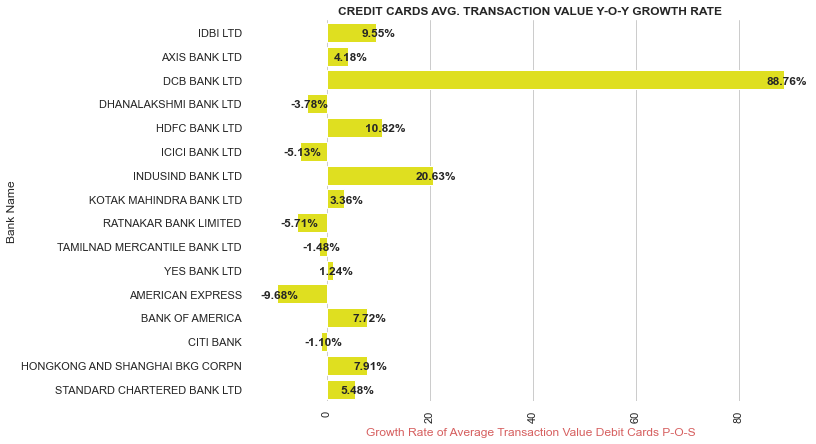

In [133]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_color_codes('muted')
plt.figure(figsize=(10,7))
ax=sns.barplot(x='YoY growth', y='Bank Name', data=check, color='yellow',ci='None')
plt.xlabel("Growth Rate of Average Transaction Value Debit Cards P-O-S",color='r')
plt.xticks(rotation=90)
sns.despine(left=True,bottom=True)
plt.title('CREDIT CARDS AVG. TRANSACTION VALUE Y-O-Y GROWTH RATE',fontweight='bold')

for p in ax.patches:
    width = p.get_width()
    plt.text(0.5+p.get_width(), p.get_y()+0.55*p.get_height(),
            '{:1.2f}%'.format(width),
             ha='center', va='center',fontweight='bold')

**Sorting values based on number of transactions(highest to lowest)**

In [134]:
prac=df_2018_copy.sort_values(by='CC_ATM_PTransac_1',ascending=False).head(10)

- Top ten banks based on avg. revenue per transactions credit cards in 2019 (highest to lowest)

> 'Hue' is used based on ownership status

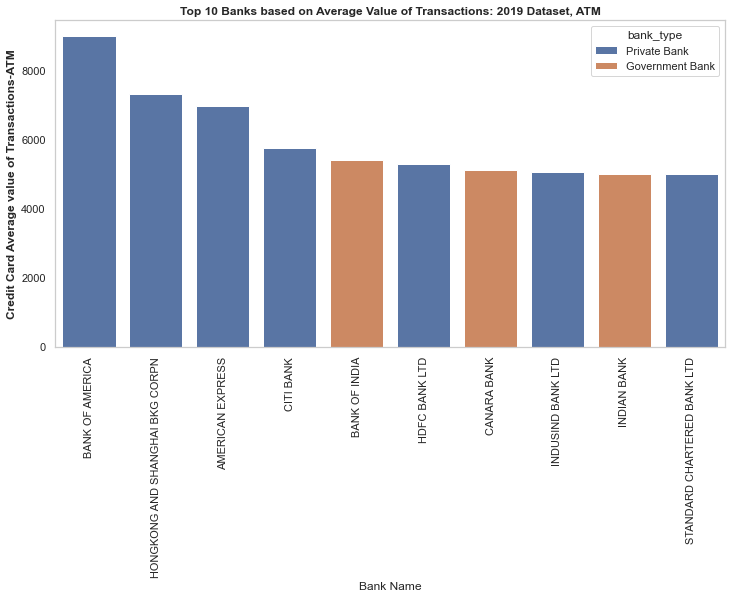

In [135]:
plt.figure(figsize=(12,6))
plot=sns.barplot(data=prac,x='Bank Name',y='CC_ATM_PTransac_1',hue='bank_type',dodge=False)
plt.xticks(rotation=90)
plt.ylabel('Credit Card Average value of Transactions-ATM', fontweight='bold')
plt.title('Top 10 Banks based on Average Value of Transactions: 2019 Dataset, ATM', fontweight='bold')
plt.grid(False)

plt.show()

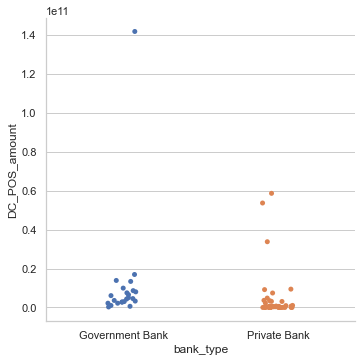

In [136]:
sns.catplot(data=df_2018_copy,x='bank_type',y='DC_POS_amount',)

In [137]:
new_private_df.head(2)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,DC_ATM_PTransac,bank_type,DC_POS_PTransac,CC_POS_PTransac_CC,CC_ATM_PTransac
17,IDBI LTD,2205,1497,34974,33317,953,137806,5008875.67000,340514446.60000,12108214,9701166,6327793,43178961328.47000,8687716444.37000,4450.90429,Private Bank,1372.94574,2470.96967,5255.90312
19,AXIS BANK LTD,5257,11631,496598,6170677,102603,16677302,442642055.00000,64455153075.00000,24185091,29505062,28524901,147832522598.69000,43053137845.00000,5010.41220,Private Bank,1509.31770,3864.84295,4314.12390


In [138]:
pvt2019_pos_graph=new_private_df.sort_values('CC_POS_Transaction',ascending=False).head(15)

In [139]:
z3=pvt2019_pos_graph.CC_POS_PTransac_CC.mean()
z3

3895.6558242261744

### Data Visualisation of average transaction of credit card POS  machines: Private Bank

> The below plot shows how the private banks stack up against each other based on average transaction levels. The banks are already **sorted** based on transactions (highest to lowest) 

- Y-Axis: Average value per transaction credit card POS Machines
- X-Axis: Private Banks

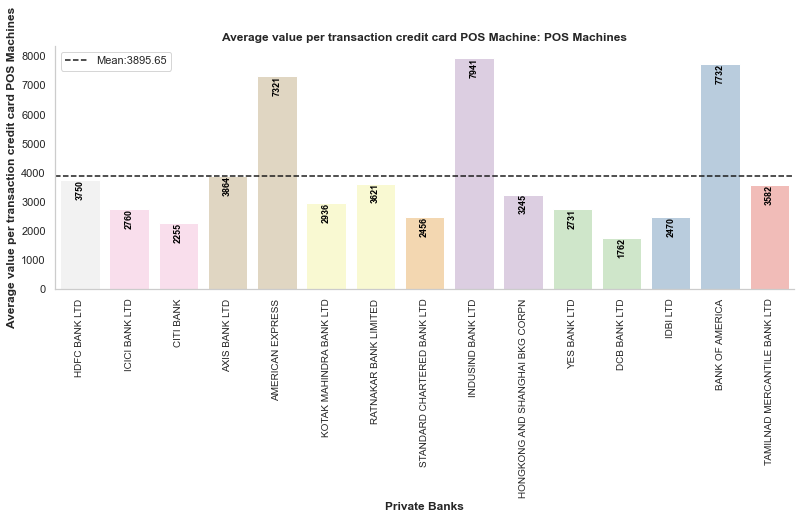

In [140]:
plot=sns.catplot(x="Bank Name",y="CC_POS_PTransac_CC",data=pvt2019_pos_graph,palette='Pastel1_r',kind='bar',height=4,aspect=3)#uepalette='cubehelix'
plt.axhline(z3,color='k',linestyle="--",label='Mean:3895.65')
plt.legend()
plt.title('Average value per transaction credit card POS Machine: POS Machines',fontweight='bold')
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Private Banks",fontweight='bold')
plt.ylabel("Average value per transaction credit card POS Machines",fontweight='bold')

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='top', 
        color='black',
        fontweight='bold',
        rotation=90,
        size=9)
plt.grid(False)



### Debit Card POS transaction Private Banks: 2019 dataset

### Conditions for visualisation: 

1. For example: The number of transactions for the month of May 2019 should be >15,000 and then the data is then sorted according to credit cards outstanding from each bank

The below graph will show the banks who hae a good established base in India, and based on their ATM transaction can deploy ATM's based on the trend.

> Point to be noted, its normally debit cards which are used more frequently than credit cards so the total number of transactions maybe lower but the average transaction value is much higher.

> The reason behind using certain conditions for visualisation and not directly plotting them is shown below. 

1. Directly plotting the data based on highest to lowest values will not show the underlying factors. For example,a private bank like **HSBC** will outperform a government bank based on average revenue per transaction. But it is important for us to plot the total number of transactions as well.
2.  Sorting the values based on factors such as credit card outstanding or total number of transactions, will provide an idea about the customer base and the depth of the bank in the Indian market

> In the below graph, it can be seen that plotting the graphs of top 5 banks based on average transaction value but their total number of transactions in not greater than the number of transactions for a provate bank like **HDFC**. So one can understand the performance of banks better.

In [141]:
pvt2019_pos_dc_graph=new_private_df.sort_values('DC_POS_Transaction',ascending=False).head(10)
pvt2019_pos_dc_graph.fillna(value=0,inplace=True)

In [142]:
z4=pvt2019_pos_dc_graph.DC_POS_PTransac.mean()
z4

1474.0020668500779

### Data Visualisation using Seaborn

> In this plot, I have sorted the dataframe on the basis of total number of transactions and have extracted the top ten values. So the bars are sorted from highest to lowest based on number of transactions.

### Color codes set according to conditions
- The visualisation is a bit different in this graph. We have given the **max** average transaction per card value the **blue** color. This will help us identify the bank which has the highest per transaction value in the dataframe
- The banks which qualify as to greater than the **mean** of the average revenue per transaction are given the green color. This will indicate they have done better than the rest in dataframe. The o=banks which are lower than the mean are given **grey** colour.

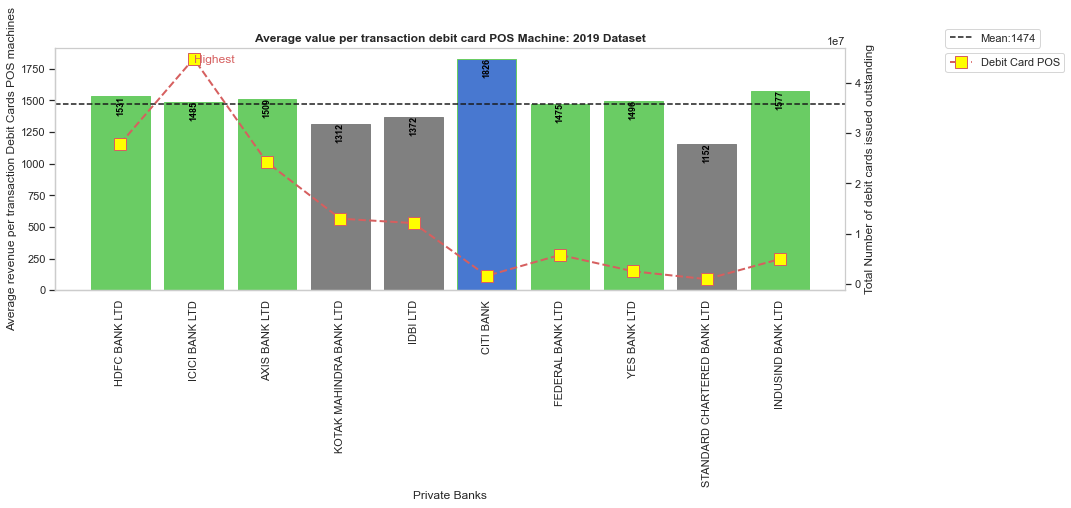

In [143]:
plot=sns.catplot(x="Bank Name",y="DC_POS_PTransac",data=pvt2019_pos_dc_graph,kind='bar',height=4,aspect=3)#uepalette='cubehelix'
plt.axhline(z4,color='k',linestyle="--",label='Mean:1474')
plt.legend(bbox_to_anchor=(1.12,1.1),loc='upper left')
plt.xticks(rotation=90)
plt.xlabel("Private Banks")
plt.ylabel("Average revenue per transaction Debit Cards POS machines")
plt.title('Average value per transaction debit card POS Machine: 2019 Dataset',fontweight='bold')

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='top', 
        color='black',
        fontweight='bold',
        rotation=90,
        size=9)
plt.grid(False)

patch_h = [] 
for bar in plot.ax.patches:
    if bar.get_height() > z4:
        bar.set_color('g')    
    else:
        bar.set_color('grey')

for bar in plot.ax.patches:
    reading = bar.get_height()
    patch_h.append(reading)        
idx_tallest = np.argmax(patch_h)
plot.ax.patches[idx_tallest].set_facecolor('b')


x = pvt2019_pos_dc_graph["Bank Name"]
y = pvt2019_pos_dc_graph["DC_Oustanding"]
axes2 = plt.twinx()
axes2.plot(x, y, color='r',label='Debit Card POS',marker='s', markerfacecolor='yellow',markersize=12,linestyle='dashed', linewidth = 2)
axes2.set_ylabel('Total Number of debit cards issued outstanding')
plt.grid(False)
axes2.annotate('Highest',(1,4.4e7),color='r',ha='left')
plt.legend(bbox_to_anchor=(1.12,1),loc='upper left')


### Data Visualization using condition based palettes

- Herein, we will show the same previous dataframe(Average revenue per transaction DC POS), the color codes will indecate the highest and lowest values
- The **deeper** the color of the bar, higher the value in dataframe; the **lighter** the color, lower the value
- This will be done by the seaborn color codes itself as the arguments are passed

> The right Y-axis consists of values Number of POS deployed online by the bank.  This will give us an idea if **higher** transaction levels is representative of **higher POS onsite**.

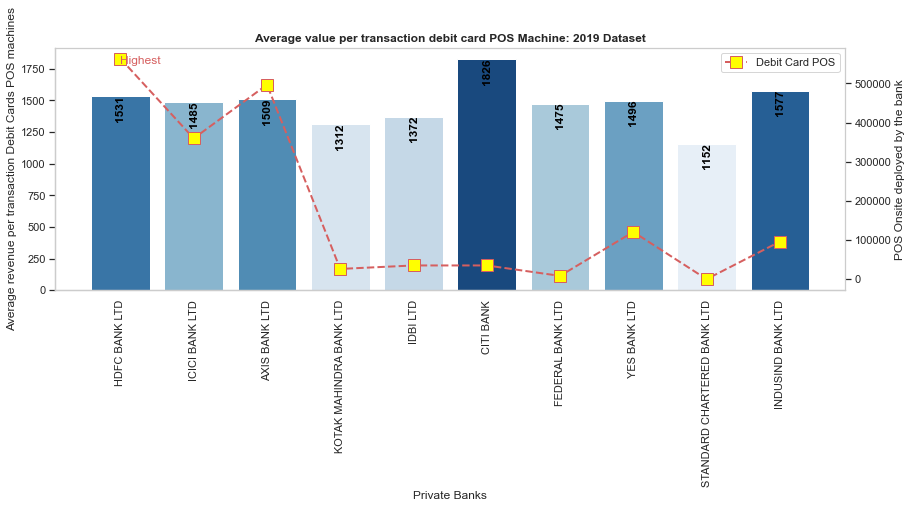

In [144]:
pal = sns.color_palette("Blues_r", len(pvt2019_pos_dc_graph['DC_POS_PTransac']))
rank = (pvt2019_pos_dc_graph['DC_POS_PTransac']).argsort().argsort()

plot=sns.catplot(x="Bank Name",y="DC_POS_PTransac",data=pvt2019_pos_dc_graph,kind='bar',height=4,aspect=3,palette=np.array(pal[::-1])[rank])#uepalette='cubehelix'
#plt.axhline(z4,color='k',linestyle="--",label='Mean:1474')
#plt.legend(bbox_to_anchor=(1.12,1.1),loc='upper left')
plt.xticks(rotation=90)
plt.xlabel("Private Banks")
plt.ylabel("Average revenue per transaction Debit Cards POS machines")
plt.title('Average value per transaction debit card POS Machine: 2019 Dataset',fontweight='bold')

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='top', 
        color='black',
        fontweight='bold',
        rotation=90,
        size=12)
plt.grid(False)

x = pvt2019_pos_dc_graph["Bank Name"]
y = pvt2019_pos_dc_graph["POS_Online"]
axes2 = plt.twinx()
axes2.plot(x, y, color='r',label='Debit Card POS',marker='s', markerfacecolor='yellow',markersize=12,linestyle='dashed', linewidth = 2)
axes2.set_ylabel('POS Onsite deployed by the bank')
plt.grid(False)
axes2.annotate('Highest',(0,550000),color='r',ha='left')
plt.legend(loc='upper right')

plt.savefig('avg_value_transactions.png',bbox_inches='tight',pad_inches=2,transparent=True)

### Government Banks 2019 Dataset:

List of Datasets for future reference:

1. govt_both_2019df=consists of all government bank values for the year 2019
2. check_govt_CCPOS= Removal of null values from credit card POS govt. banks
3. check_govt_CCPOS_1= Government bank values sorted on the basis of pos online
4. check_govt_CCATM= consists of all credit card atm govt bank values >0
5. govt_check_12: consits of the same 2019 government dataframe with the **total ATM values**
6. check_govt_CCATM_12: Top 10 government banks sorted on the basis of ATM's deployed 


In [145]:
n_df1=n_df.copy()

In [146]:
criteria14=n_df1['bank_type']=='Government Bank'
govt_both_2019df=n_df1[criteria14]

In [147]:
nan_value=float("Nan")
govt_both_2019df.replace(0,nan_value,inplace=True)

C:\Users\sanyalam\Anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [148]:
check_govt_CCPOS=govt_both_2019df[govt_both_2019df['CC_POS_PTransac_CC'].notna()]

In [149]:
z7=check_govt_CCPOS.CC_POS_PTransac_CC.mean()
z7

2555.0639416295808

In [150]:
check_govt_CCPOS_1=check_govt_CCPOS.sort_values('POS_Online',ascending=False).head(10)
check_govt_CCPOS_1.head(5)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,DC_ATM_PTransac,bank_type,DC_POS_PTransac,CC_POS_PTransac_CC,CC_ATM_PTransac
18,STATE BANK OF INDIA,25606,32883,589127,8734604.00000,160944.00000,28644056.00000,610928567.00000,105373145348.94002,297165746,376403513,117026441,1130261407353.59009,176121198837.14001,3002.79187,Government Bank,1504.96928,3678.70896,3795.90769
7,CORPORATION BANK,2414,629,222811,111173.00000,2231.00000,170128.00000,10888919.00000,409862928.55000,6619998,6996637,4040959,28779991306.58000,5098980537.42000,4113.40353,Government Bank,1261.82437,2409.14446,4880.73465
2,BANK OF BARODA,9321,3850,78791,324275.00000,21107.00000,838895.00000,92758063.77000,1883972069.87000,48888337,32035602,16675739,125633462025.57001,14651528984.77000,3921.68257,Government Bank,878.61347,2245.77816,4394.65882
3,BANK OF INDIA,2645,3509,67740,185605.00000,22457.00000,344241.00000,127086755.17000,849792204.89000,36822577,19297659,10305371,70860315524.78000,11220117555.63000,3671.96433,Government Bank,1088.76406,2468.59672,5659.11543
12,PUNJAB NATIONAL BANK,5225,3714,67277,355448.00000,6157.00000,661531.00000,16859639.20000,1405406032.12000,20825477,24617942,14199327,111699263912.03999,19723260247.36000,4537.31120,Government Bank,1389.02782,2124.47494,2738.28800


In [151]:
z8=check_govt_CCPOS_1.CC_POS_PTransac_CC.mean()
z8

2628.9584910045987

In [152]:
check_govt_CCATM=govt_both_2019df[govt_both_2019df['CC_ATM_PTransac'].notna()]

> Combining both ATMs deployed onsite and offsite to get the total number of atm's deployed by the bank. The new column will be called ATM_Total

In [153]:
govt_check_12=govt_both_2019df.assign(ATM_Total=govt_both_2019df['ATM_Offsite']+govt_both_2019df['ATM_Onsite'])

In [154]:
check_govt_CCATM_12=govt_check_12.sort_values('ATM_Total',ascending=False).head(10)

In [155]:
z10=check_govt_CCATM_12.CC_ATM_PTransac.mean()
z10

4595.873400576882

In [156]:
check_govt_CCATM_12.head(2)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,DC_ATM_PTransac,bank_type,DC_POS_PTransac,CC_POS_PTransac_CC,CC_ATM_PTransac,ATM_Total
18,STATE BANK OF INDIA,25606,32883,589127,8734604.00000,160944.00000,28644056.00000,610928567.00000,105373145348.94002,297165746,376403513,117026441,1130261407353.59009,176121198837.14001,3002.79187,Government Bank,1504.96928,3678.70896,3795.90769,58489
2,BANK OF BARODA,9321,3850,78791,324275.00000,21107.00000,838895.00000,92758063.77000,1883972069.87000,48888337,32035602,16675739,125633462025.57001,14651528984.77000,3921.68257,Government Bank,878.61347,2245.77816,4394.65882,13171


### Scatter plot of ATM's total number of CC transactions vs value of transactions (government banks)

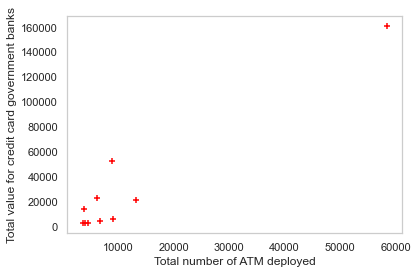

In [157]:
%matplotlib inline
plt.xlabel('Total number of ATM deployed')
plt.ylabel('Total value for credit card government banks')
plt.scatter(check_govt_CCATM_12.ATM_Total,check_govt_CCATM_12.CC_ATM_Transaction,color='red',marker="+")
plt.grid(False)

## BINNING DATA: 2018 Datasets

In [158]:
#2018 private banks dataset
new_private_df_2018.head(1)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,bank_type,DC_ATM_PTransac_1,CC_ATM_PTransac_1,DC_POS_PTransac_2018,CC_POS_PTransac_2018
19,IDBI LTD,2185,1554,30102,0,28773,824,158789,3991842.95000,358162146.94000,11697817,8922033,7331453,39397488167.00999,7418554703.67000,Private Bank,4415.75235,4844.46960,1011.88055,2255.58538


In [159]:
#Extracting certain features from the big dataframe
bin_private_2018=new_private_df_2018[['Bank Name','DC_POS_PTransac_2018','CC_POS_PTransac_2018','POS_Online','CC_POS_Transaction','DC_POS_Transaction']]

In [160]:
bin_private_2018.set_index('Bank Name').head(1)

,DC_POS_PTransac_2018,CC_POS_PTransac_2018,POS_Online,CC_POS_Transaction,DC_POS_Transaction
Bank Name,,,,,
IDBI LTD,1011.88055,2255.58538,30102,158789,7331453


In [161]:
nan_value=float("Nan")
bin_private_2018.replace(0,nan_value,inplace=True)

C:\Users\sanyalam\Anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


### For Private Banks-2018 dataset Debit Card POS transactions 

In [162]:
bin_pvt_DCPOS=bin_private_2018[bin_private_2018['DC_POS_PTransac_2018'].notna()]

In [163]:
bin_pvt_DCPOS.head(1)

,Bank Name,DC_POS_PTransac_2018,CC_POS_PTransac_2018,POS_Online,CC_POS_Transaction,DC_POS_Transaction
19,IDBI LTD,1011.88055,2255.58538,30102.00000,158789.00000,7331453.00000


### Private bank 2018 dataset Bins:
> There will be a binfunction which will divide the dataset based on certain conditions.
1. For example: Below we will be binning on the basis of 2018 average debit card transaction values. 

Datasets for reference:
1. bin_pvt_DCPOS: binned database private banks based on average debit card transaction values
2. high_pvt_2018_dcpos: database consisting of only "debit card average transaction values" which are categorised as **highest**
3. bin_pvt_CCPOS: binned database private banks based on average credit card transaction values
4. top10_cc_pos2018: Top ten private banks sorted based on total number of transactions

In [164]:
#binning function
def binfunction(col,cut_points,labels=None):
    minval=col.min()
    maxval=col.max()
    break_points=[minval]+cut_points+[maxval]
    print(break_points)
    if not labels:
        labels=range(len(cut_points)+1)
    colBin=pd.cut(col,bins=break_points,labels=labels,include_lowest=True,duplicates="drop")
    return colBin

In [165]:
cut_points=[500,1000,1500]
labels=["Low","Average","Above average","High"]
bin_pvt_DCPOS["Combined_category_DC"]=binfunction(bin_pvt_DCPOS["DC_POS_PTransac_2018"],cut_points,labels)
bin_pvt_DCPOS.head(1)

[79.93376486527171, 500, 1000, 1500, 5725.9616000000005]


<ipython-input-165-0b5df6e52abc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_pvt_DCPOS["Combined_category_DC"]=binfunction(bin_pvt_DCPOS["DC_POS_PTransac_2018"],cut_points,labels)


,Bank Name,DC_POS_PTransac_2018,CC_POS_PTransac_2018,POS_Online,CC_POS_Transaction,DC_POS_Transaction,Combined_category_DC
19,IDBI LTD,1011.88055,2255.58538,30102.00000,158789.00000,7331453.00000,Above average


In [166]:
bin_pvt_DCPOS['Combined_category_DC'].value_counts()

High             14
Above average    13
Average           6
Low               4
Name: Combined_category_DC, dtype: int64

In [167]:
#new dataset of highest values for POS DC private banks 2018 dataset
high_pvt_2018_dcpos=bin_pvt_DCPOS[(bin_pvt_DCPOS['Combined_category_DC']=='High')]

In [168]:
high_pvt_2018_dcpos.drop(['CC_POS_PTransac_2018','CC_POS_Transaction'],axis=1).head(5)

,Bank Name,DC_POS_PTransac_2018,POS_Online,DC_POS_Transaction,Combined_category_DC
22,BANDHAN BANK LTD,1535.20296,22401.00000,610698.00000,High
23,CATHOLIC SYRIAN BANK LTD,1848.98584,nan,165740.00000,High
25,DCB BANK LTD,1903.62962,1580.00000,307424.00000,High
26,DHANALAKSHMI BANK LTD,1583.41543,1114.00000,225660.00000,High
27,FEDERAL BANK LTD,1524.88152,11049.00000,3155567.00000,High


For **private bank** credit card transactions:

In [169]:
bin_pvt_CCPOS=bin_private_2018[bin_private_2018['CC_POS_Transaction'].notna()]

In [170]:
#Labelling
cut_points=[1500,2500,3500]
labels=["Low","Average","Above average","High"]
bin_pvt_CCPOS["Combined_category_CC"]=binfunction(bin_pvt_CCPOS["CC_POS_PTransac_2018"],cut_points,labels)
bin_pvt_CCPOS.head(1)

[933.888025872451, 1500, 2500, 3500, 8106.100709655377]


<ipython-input-170-4621caef38e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_pvt_CCPOS["Combined_category_CC"]=binfunction(bin_pvt_CCPOS["CC_POS_PTransac_2018"],cut_points,labels)


,Bank Name,DC_POS_PTransac_2018,CC_POS_PTransac_2018,POS_Online,CC_POS_Transaction,DC_POS_Transaction,Combined_category_CC
19,IDBI LTD,1011.88055,2255.58538,30102.00000,158789.00000,7331453.00000,Average


In [171]:
bin_pvt_CCPOS['Combined_category_CC'].value_counts()

High             6
Above average    5
Average          4
Low              1
Name: Combined_category_CC, dtype: int64

In [172]:
#categorisation based on highest values 
high_pvt_2018_ccpos=bin_pvt_CCPOS[(bin_pvt_CCPOS['Combined_category_CC']=='High')]

In [173]:
top10_cc_pos2018=bin_pvt_CCPOS.sort_values(by='CC_POS_Transaction',ascending=False).head(10)
top10_cc_pos2018['POS_Online']=top10_cc_pos2018['POS_Online'].fillna(0)

In [174]:
top10_cc_pos2018.head(1)

,Bank Name,DC_POS_PTransac_2018,CC_POS_PTransac_2018,POS_Online,CC_POS_Transaction,DC_POS_Transaction,Combined_category_CC
28,HDFC BANK LTD,1418.14411,3384.22407,414056.00000,38322777.00000,41316850.00000,Above average


In [175]:
z11=top10_cc_pos2018.CC_POS_PTransac_2018.median()
z11

3195.9048283463508

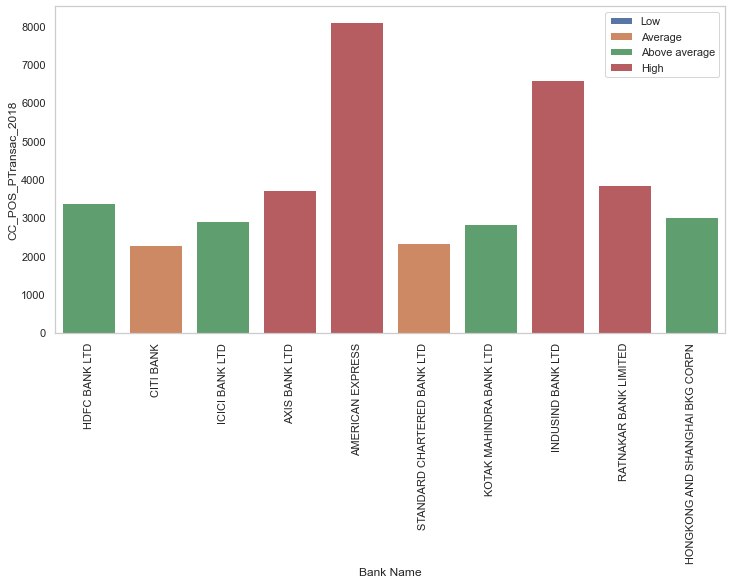

In [176]:
plt.figure(figsize=(12,6))
sns.barplot(data=top10_cc_pos2018,x='Bank Name',y='CC_POS_PTransac_2018',hue='Combined_category_CC',dodge=False)
plt.legend()
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Government Banks 2018 Dataset: binning

Datasets for reference:
1. bin_govt_2018: Consists of all relevant categories government banks 2018 dataset
2. bin_govt_DC2018: copy of above dataset
3. top10_dcgovt_pos2018: Top ten government banks based on number of DC transactions
4. bin_govt_CC2018: copy of 'bin_govt_2018' dataset for credit cards
5. bin_govt_CCPOS2018: consists of dataset which doesnt have '0' average per transaction value
6. top10_ccgovt_pos2018: top 10 banks based on CC total number of transactions


In [177]:
df_govt_2018_cc_1.head(1)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,bank_type,DC_ATM_PTransac_1,CC_ATM_PTransac_1,DC_POS_PTransac_2018,CC_POS_PTransac_2018
0,ALLAHABAD BANK,850,265,3063,0,0,0,0,0.00000,0.00000,13042946,8196370,4687837,20161644307.32000,3023795908.58000,Government Bank,2459.82603,0.00000,645.03009,0.00000


In [178]:
bin_govt_2018=df_govt_2018_cc_1[['Bank Name','DC_POS_PTransac_2018','CC_POS_PTransac_2018','POS_Online','CC_POS_Transaction','DC_POS_Transaction']]

In [179]:
bin_govt_DC2018=bin_govt_2018.copy()

In [180]:
#labelling
cut_points=[1000,1500,2000]
labels=["Low","Average","Above average","High"]
bin_govt_DC2018["Combined_category_DC"]=binfunction(bin_govt_DC2018["DC_POS_PTransac_2018"],cut_points,labels)

[645.0300871340023, 1000, 1500, 2000, 2694.128177612936]


In [181]:
#top 10 govt banks DC transactions
top10_dcgovt_pos2018=bin_govt_DC2018.sort_values(by='DC_POS_Transaction',ascending=False).head(10)

In [182]:
# copy of dataset for credit card transactions
bin_govt_CC2018=bin_govt_2018.copy()

In [183]:
nan_value=float("Nan")
bin_govt_CC2018.replace(0,nan_value,inplace=True)

In [184]:
#removing null values from PTransac columns
bin_govt_CCPOS2018=bin_govt_CC2018[bin_govt_CC2018['CC_POS_PTransac_2018'].notna()]

In [185]:
print(bin_govt_CCPOS2018.shape)

(16, 6)


In [186]:
#labelling
cut_points=[2000,2500,3000]
labels=["Low","Average","Above average","High"]
bin_govt_CCPOS2018["Combined_category_CC"]=binfunction(bin_govt_CCPOS2018["CC_POS_PTransac_2018"],cut_points,labels)

[253.9452203881734, 2000, 2500, 3000, 3846.839834974841]


<ipython-input-186-286171e1ae51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_govt_CCPOS2018["Combined_category_CC"]=binfunction(bin_govt_CCPOS2018["CC_POS_PTransac_2018"],cut_points,labels)


In [187]:
#top ten government banks based on CC POS
top10_ccgovt_pos2018=bin_govt_CCPOS2018.sort_values(by='CC_POS_Transaction',ascending=False).head(10)

In [188]:
top10_ccgovt_pos2018.head(2)

,Bank Name,DC_POS_PTransac_2018,CC_POS_PTransac_2018,POS_Online,CC_POS_Transaction,DC_POS_Transaction,Combined_category_CC
20,STATE BANK OF INDIA,1454.93317,3591.90263,618452,21861288.00000,97390937,High
13,PUNJAB NATIONAL BANK,1312.76819,2242.82825,52556,675835.00000,12894957,Average


In [189]:
z14=top10_ccgovt_pos2018.DC_POS_PTransac_2018.mean()
z14

1373.2496330099125

### Visualisation of both CC and DC average transactions: Government datasets

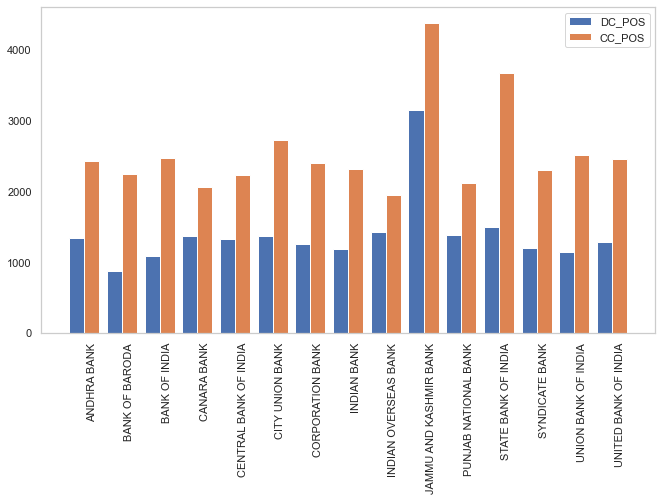

In [190]:
import numpy as np
w=0.4
plt.figure(figsize=(11,6))
x=merged_inner11.index
bar1=np.arange(len(merged_inner11.index))
bar2=[i+w for i in bar1]
plt.bar(bar1,merged_inner11['DC_POS_PTransac'],w,label='DC_POS')
plt.bar(bar2,merged_inner11['CC_POS_PTransac_CC'],w,label='CC_POS')
plt.legend()
plt.grid(False)
plt.xticks(bar2,x,rotation=90)
plt.show()

## 2018 Dataset: Visual Analysis

In [191]:
#creating a copy of dataset
newdataset_2018=df_2018_copy

In [192]:
newdataset_2018.head(1)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,bank_type,DC_ATM_PTransac_1,CC_ATM_PTransac_1,DC_POS_PTransac_2018,CC_POS_PTransac_2018
0,ALLAHABAD BANK,850,265,3063,0,0,0,0,0.00000,0.00000,13042946,8196370,4687837,20161644307.32000,3023795908.58000,Government Bank,2459.82603,0.00000,645.03009,0.00000


In [193]:
newdataset_2018.CC_POS_Transaction.mean()

2095310.378787879

In [194]:
#creating a function to see which banks have greater than 15,00,000 transactions per month for debit cards POS
def getdata(a):
    return a>1500000


newdataset_2018['DCPOS_greater']=newdataset_2018['DC_POS_Transaction'].map(getdata)

In [195]:
#31 banks have greater than 15,00,000 transactions per month DC POS
newdataset_2018.DCPOS_greater.value_counts()

False    35
True     31
Name: DCPOS_greater, dtype: int64

## Creating Dummies based on Transactions

In [196]:
newdataset_2018=pd.get_dummies(newdataset_2018,columns=['DCPOS_greater'])

In [197]:
newdataset_2018=newdataset_2018.drop('DCPOS_greater_False',axis=1)

In [198]:
newdataset_2018.head(1)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,...,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,bank_type,DC_ATM_PTransac_1,CC_ATM_PTransac_1,DC_POS_PTransac_2018,CC_POS_PTransac_2018,DCPOS_greater_True
0,ALLAHABAD BANK,850,265,3063,0,0,0,0,0.00000,0.00000,...,8196370,4687837,20161644307.32000,3023795908.58000,Government Bank,2459.82603,0.00000,645.03009,0.00000,1


In [199]:
boxplot_type=newdataset_2018[['bank_type','DC_POS_PTransac_2018']]

## Boxplots for 2018 datasets

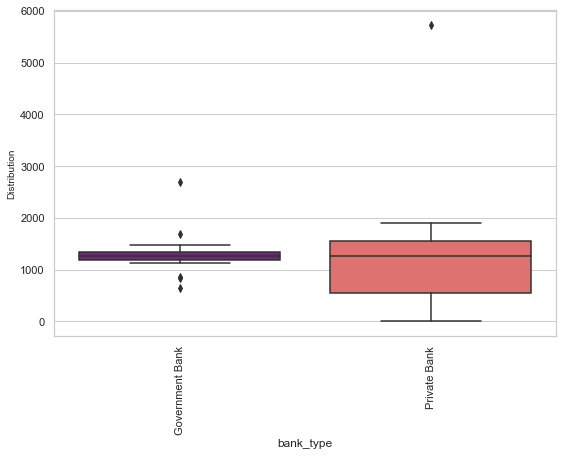

In [200]:
plt.rcParams['figure.figsize'] = (9, 6)
ax = sns.boxplot(x = 'bank_type', y = 'DC_POS_PTransac_2018', data = boxplot_type, palette = 'magma')
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
plt.xticks(rotation = 90)
plt.show()

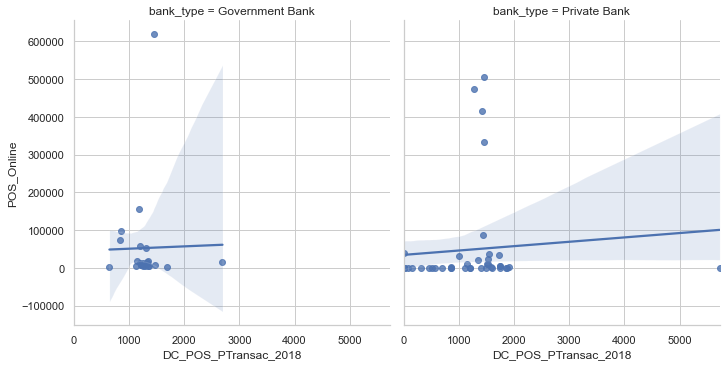

In [201]:
sns.lmplot(x='DC_POS_PTransac_2018',y='POS_Online',data=newdataset_2018,col='bank_type')
plt.show()

In [202]:
a32_df=bin_govt_CCPOS2018.drop('Combined_category_CC',axis=1)
a32_df.head(1)

,Bank Name,DC_POS_PTransac_2018,CC_POS_PTransac_2018,POS_Online,CC_POS_Transaction,DC_POS_Transaction
1,ANDHRA BANK,1324.59547,2429.98454,14311,503715.00000,6050753


### Scatter PLot for all variables in 2018 government dataset

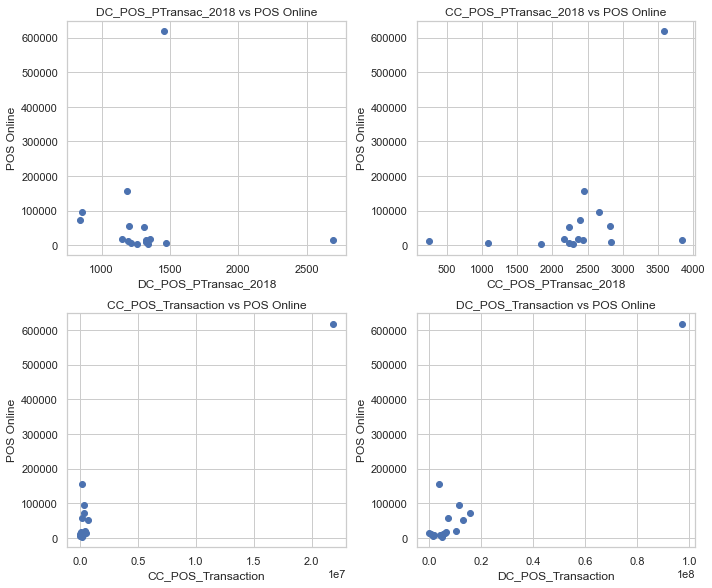

In [203]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(a32_df[x],a32_df['POS_Online'])
    plt.title(x+' vs POS Online')
    plt.ylabel('POS Online')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('DC_POS_PTransac_2018', 1)
scatter('CC_POS_PTransac_2018', 2)
scatter('CC_POS_Transaction', 3)
scatter('DC_POS_Transaction', 4)

plt.tight_layout()

### JointPlot for 2018 dataset

C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


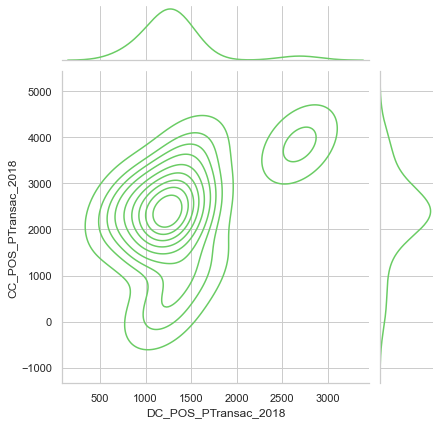

In [204]:
sns.jointplot("DC_POS_PTransac_2018","CC_POS_PTransac_2018",data=a32_df,kind='kde',color='g')

C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bank_type', ylabel='DC_POS_PTransac_2018'>

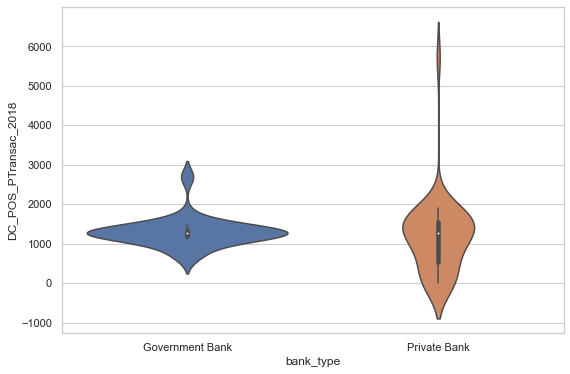

In [205]:
sns.violinplot('bank_type','DC_POS_PTransac_2018', data = newdataset_2018)